In [6]:
import numpy as np
import matplotlib.pyplot as plt
import subprocess

In [7]:
mode = 1
subprocess.call('grep "^ATOM" ../mode' + str(mode) + '/mode' + str(mode) + "image_avg_bottom.pdb | awk '{ print $7" + '" "' + "$8" + '" "' + "$9 }' > tmp", shell = True)
ref = np.loadtxt('tmp')
subprocess.call('rm -rfv tmp', shell = True)
print(ref)

traj = np.reshape(ref.ravel(), (11, 228)).T
avg_coor = np.loadtxt('../avg_coor')
QINV = np.reshape(np.loadtxt('../com_RTmatrix'), (228, 228))
Q = np.reshape(np.loadtxt('../com_Rmatrix'), (228, 228))

[[  8.469   1.966  11.235]
 [  4.835   0.845  11.482]
 [  2.083   1.831   8.989]
 ...
 [ -9.497  -8.296 -14.163]
 [-11.559 -10.009 -16.266]
 [-12.659 -12.17  -17.373]]


In [5]:
#Get the mode trajectory from the structures along the path
xi = np.matmul(QINV, traj)

R_a = np.zeros((228, 11))
for i in range(R_a.shape[0]):
    for k in range(R_a.shape[1]):
        R_a[i,k] = avg_coor.ravel()[i] + Q[i,mode]*xi[mode,k]

In [6]:
nimages = 11
nres = 76

data = np.zeros((nimages, nres, 3))
counter = 0
for i in range(nimages):
    data[i, :, :] = ref[counter:nres + counter, :]
    counter += nres

In [7]:
nimages = 11
nres = 76
for mode in range(1, 11):
    subprocess.call('grep "^ATOM" mode' + str(mode) + '/mode' + str(mode) + "image_avg_bottom.pdb | awk '{ print $7" + '" "' + "$8" + '" "' + "$9 }' > tmp", shell = True)
    ref = np.loadtxt('tmp')
    subprocess.call('rm -rfv tmp', shell = True)
    data = np.zeros((nimages, nres, 3))
    counter = 0
    for i in range(nimages):
        data[i, :, :] = ref[counter:nres + counter, :]
        counter += nres

    rmsf = np.zeros(nres)

    for i in range(nimages):
        for j in range(nres):
            rmsf[j] += np.dot(data[i,j,:] - data[0,j,:], data[i,j,:] - data[0,j,:])
    rmsf = rmsf / nimages
    rmsf = np.sqrt(rmsf)
    
    plt.plot(np.arange(1, nres + 1), rmsf, lw = 2, c = 'k')
    
    subprocess.call('grep "^ATOM" mode' + str(mode) + '/mode' + str(mode) + "image_avg_top.pdb | awk '{ print $7" + '" "' + "$8" + '" "' + "$9 }' > tmp", shell = True)
    ref = np.loadtxt('tmp')
    subprocess.call('rm -rfv tmp', shell = True)
    data = np.zeros((nimages, nres, 3))
    counter = 0
    for i in range(nimages):
        data[i, :, :] = ref[counter:nres + counter, :]
        counter += nres

    rmsf = np.zeros(nres)

    for i in range(nimages):
        for j in range(nres):
            rmsf[j] += np.dot(data[i,j,:] - data[0,j,:], data[i,j,:] - data[0,j,:])
    rmsf = rmsf / nimages
    rmsf = np.sqrt(rmsf)
    
    plt.plot(np.arange(1, nres + 1), rmsf, lw = 2, c = 'r')
    
    lml = np.loadtxt('lml_' + str(mode) + '.dat')
    plt.plot(np.arange(1, nres + 1), lml, lw = 2, c = 'b')
    
    plt.title('Mode ' + str(mode), fontsize = 20)
    plt.ylim((0, 1.1*lml.max()))
    plt.xlim((1, 76))
    plt.show()
    plt.close()

/home/ebeyerle/bin/anaconda3/envs/pyemma_tutorials/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: loadtxt: Empty input file: "tmp"
  """


IndexError: too many indices for array

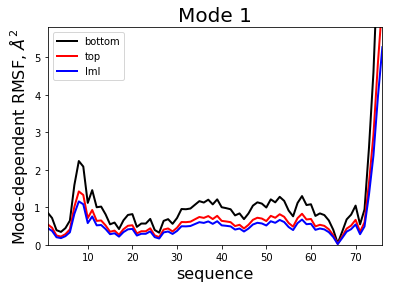

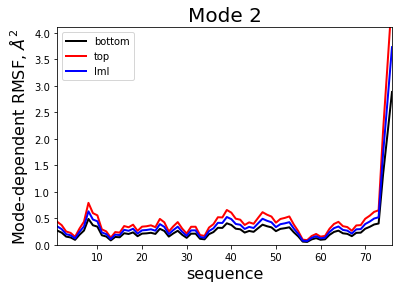

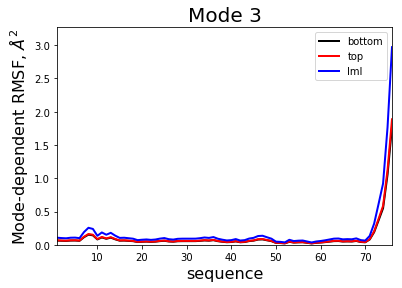

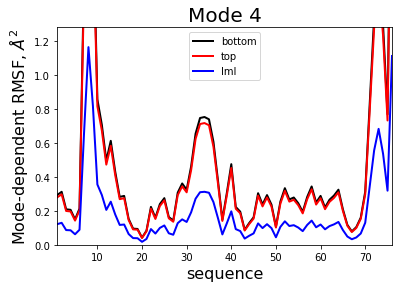

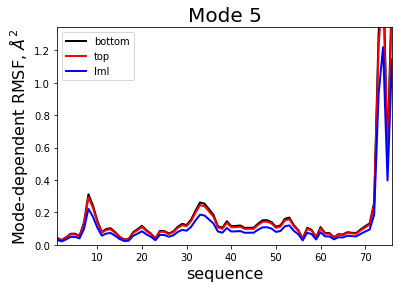

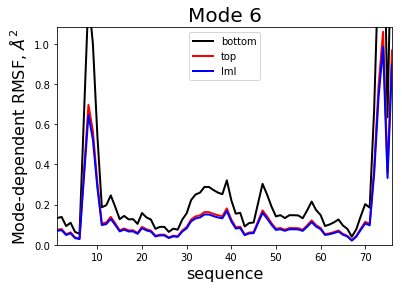

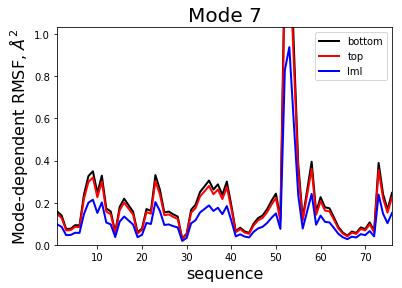

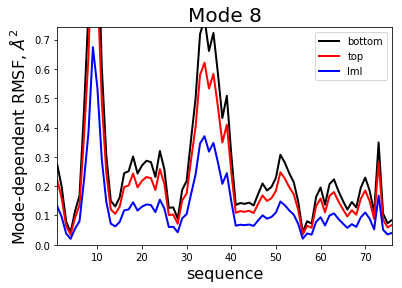

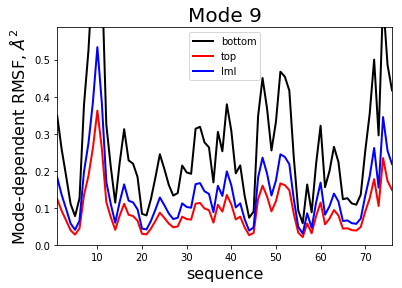

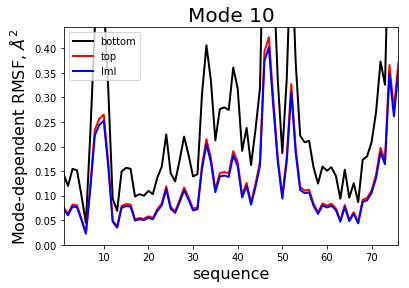

In [10]:
nimages = 11
nres = 76
for mode in range(1, 11):
    subprocess.call('grep "^ATOM" ../mode' + str(mode) + '/mode' + str(mode) + "image_avg_bottom.pdb | awk '{ print $7" + '" "' + "$8" + '" "' + "$9 }' > tmp", shell = True)
    ref = np.loadtxt('tmp')
    subprocess.call('rm -rfv tmp', shell = True)
    #print(ref)

    traj = np.reshape(ref.ravel(), (nimages, 3*nres)).T
    avg_coor = np.loadtxt('../avg_coor')
    QINV = np.reshape(np.loadtxt('../com_RTmatrix'), (3*nres, 3*nres))
    Q = np.reshape(np.loadtxt('../com_Rmatrix'), (3*nres, 3*nres))
    
    xi = np.matmul(QINV, traj)

    R_a = np.zeros((3*nres, nimages))
    for i in range(R_a.shape[0]):
        for k in range(R_a.shape[1]):
            R_a[i,k] = avg_coor.ravel()[i] + Q[i,mode - 1]*xi[mode - 1,k]
            
    traj = R_a

    rmsf = np.zeros(nres)

    for i in range(nimages):
        for num, j in enumerate(range(0, 3*nres, 3)):
            rmsf[num] += (traj[j, i] - traj[j, 0])**2 + (traj[j+1, i] - traj[j+1, 0])**2 + (traj[j+2, i] - traj[j+2, 0])**2
    rmsf = rmsf / nimages
    rmsf = np.sqrt(rmsf)
    
    plt.plot(np.arange(1, nres + 1), rmsf, lw = 2, c = 'k', label = 'bottom')
    
    subprocess.call('grep "^ATOM" ../mode' + str(mode) + '/mode' + str(mode) + "image_avg_top.pdb | awk '{ print $7" + '" "' + "$8" + '" "' + "$9 }' > tmp", shell = True)
    ref = np.loadtxt('tmp')
    subprocess.call('rm -rfv tmp', shell = True)
    #print(ref)
    
    traj = np.reshape(ref.ravel(), (nimages, 3*nres)).T
    
    xi = np.matmul(QINV, traj)

    R_a = np.zeros((3*nres, nimages))
    for i in range(R_a.shape[0]):
        for k in range(R_a.shape[1]):
            R_a[i,k] = avg_coor.ravel()[i] + Q[i,mode - 1]*xi[mode - 1,k]
            
    traj = R_a

    rmsf = np.zeros(nres)

    for i in range(nimages):
        for num, j in enumerate(range(0, 3*nres, 3)):
            rmsf[num] += (traj[j, i] - traj[j, 0])**2 + (traj[j+1, i] - traj[j+1, 0])**2 + (traj[j+2, i] - traj[j+2, 0])**2
    rmsf = rmsf / nimages
    rmsf = np.sqrt(rmsf)
    
    plt.plot(np.arange(1, nres + 1), rmsf, lw = 2, c = 'r', label = 'top')
    
    lml = np.loadtxt('../lml_' + str(mode) + '.dat')
    plt.plot(np.arange(1, nres + 1), lml, lw = 2, c = 'b', label = 'lml')
    
    plt.title('Mode ' + str(mode), fontsize = 20)
    plt.ylim((0, 1.1*lml.max()))
    plt.xlim((1, nres))
    plt.xlabel('sequence', fontsize = 16)
    plt.ylabel(r'Mode-dependent RMSF, $\AA^2$', fontsize = 16)
    plt.legend()
    plt.savefig('../figures/rmsf_path_mode' + str(mode) + '.pdf', dpi = 300)
    plt.show()
    plt.close()

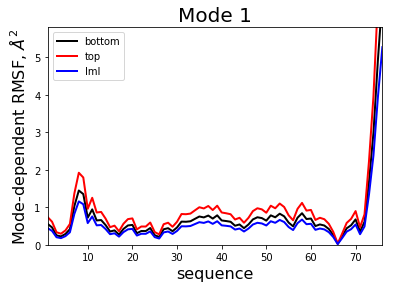

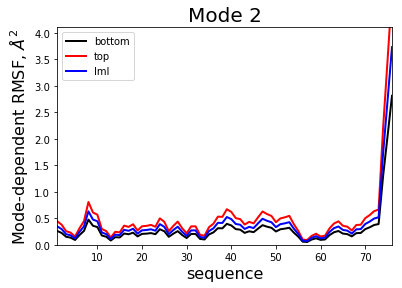

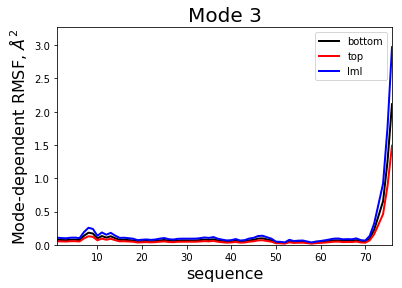

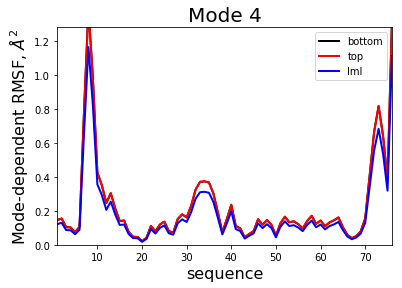

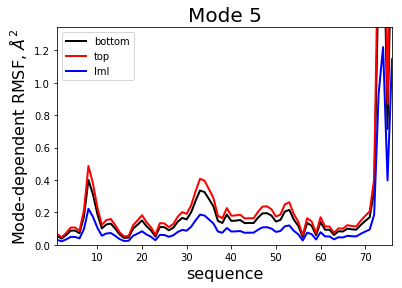

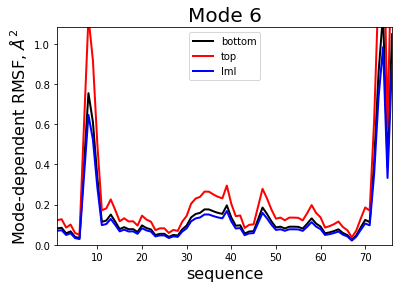

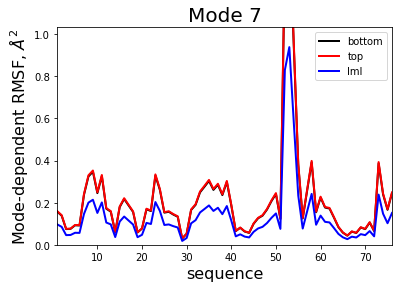

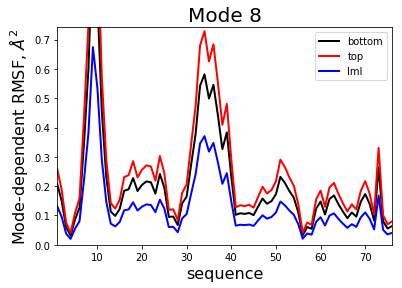

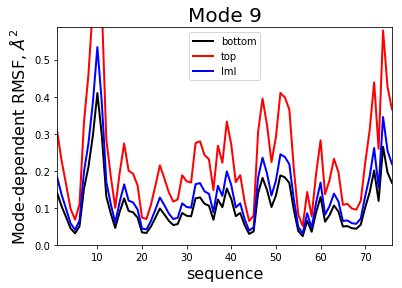

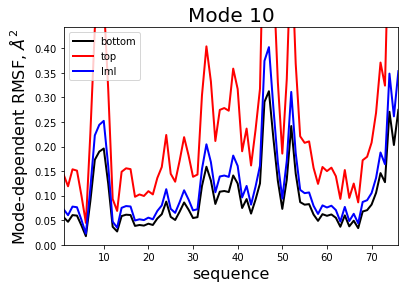

In [9]:
#Use the last image as the reference
nimages = 11
nres = 76
for mode in range(1, 11):
    subprocess.call('grep "^ATOM" ../mode' + str(mode) + '/mode' + str(mode) + "image_avg_bottom.pdb | awk '{ print $7" + '" "' + "$8" + '" "' + "$9 }' > tmp", shell = True)
    ref = np.loadtxt('tmp')
    subprocess.call('rm -rfv tmp', shell = True)
    #print(ref)

    traj = np.reshape(ref.ravel(), (nimages, 3*nres)).T
    avg_coor = np.loadtxt('../avg_coor')
    QINV = np.reshape(np.loadtxt('../com_RTmatrix'), (3*nres, 3*nres))
    Q = np.reshape(np.loadtxt('../com_Rmatrix'), (3*nres, 3*nres))
    
    xi = np.matmul(QINV, traj)

    R_a = np.zeros((3*nres, nimages))
    for i in range(R_a.shape[0]):
        for k in range(R_a.shape[1]):
            R_a[i,k] = avg_coor.ravel()[i] + Q[i,mode - 1]*xi[mode - 1,k]
            
    traj = R_a

    rmsf = np.zeros(nres)

    for i in range(nimages):
        for num, j in enumerate(range(0, 3*nres, 3)):
            rmsf[num] += (traj[j, i] - traj[j, -1])**2 + (traj[j+1, i] - traj[j+1, -1])**2 + (traj[j+2, i] - traj[j+2, -1])**2
    rmsf = rmsf / nimages
    rmsf = np.sqrt(rmsf)
    
    plt.plot(np.arange(1, nres + 1), rmsf, lw = 2, c = 'k', label = 'bottom')
    
    subprocess.call('grep "^ATOM" ../mode' + str(mode) + '/mode' + str(mode) + "image_avg_top.pdb | awk '{ print $7" + '" "' + "$8" + '" "' + "$9 }' > tmp", shell = True)
    ref = np.loadtxt('tmp')
    subprocess.call('rm -rfv tmp', shell = True)
    #print(ref)
    
    traj = np.reshape(ref.ravel(), (nimages, 3*nres)).T
    
    xi = np.matmul(QINV, traj)

    R_a = np.zeros((3*nres, nimages))
    for i in range(R_a.shape[0]):
        for k in range(R_a.shape[1]):
            R_a[i,k] = avg_coor.ravel()[i] + Q[i,mode - 1]*xi[mode - 1,k]
            
    traj = R_a

    rmsf = np.zeros(nres)

    for i in range(nimages):
        for num, j in enumerate(range(0, 3*nres, 3)):
            rmsf[num] += (traj[j, i] - traj[j, -1])**2 + (traj[j+1, i] - traj[j+1, -1])**2 + (traj[j+2, i] - traj[j+2, -1])**2
    rmsf = rmsf / nimages
    rmsf = np.sqrt(rmsf)
    
    plt.plot(np.arange(1, nres + 1), rmsf, lw = 2, c = 'r', label = 'top')
    
    lml = np.loadtxt('../lml_' + str(mode) + '.dat')
    plt.plot(np.arange(1, nres + 1), lml, lw = 2, c = 'b', label = 'lml')
    
    plt.title('Mode ' + str(mode), fontsize = 20)
    plt.ylim((0, 1.1*lml.max()))
    plt.xlim((1, nres))
    plt.xlabel('sequence', fontsize = 16)
    plt.ylabel(r'Mode-dependent RMSF, $\AA^2$', fontsize = 16)
    plt.legend()
    plt.savefig('../figures/rmsf_path_mode' + str(mode) + '.pdf', dpi = 300)
    plt.show()
    plt.close()

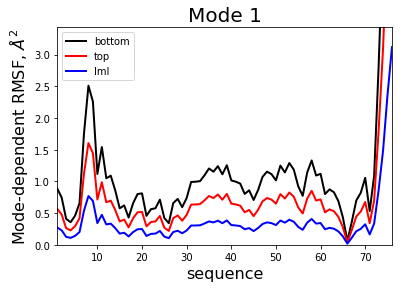

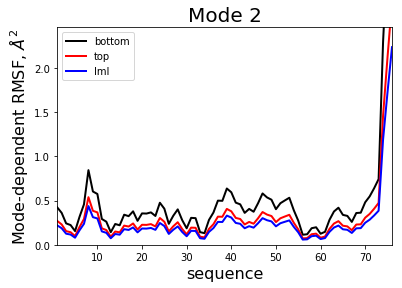

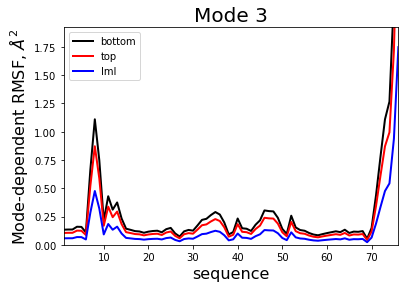

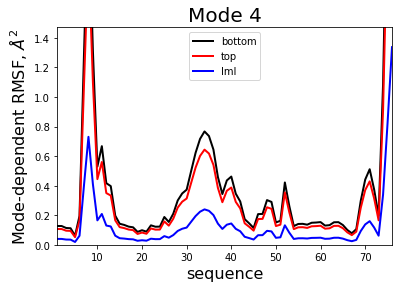

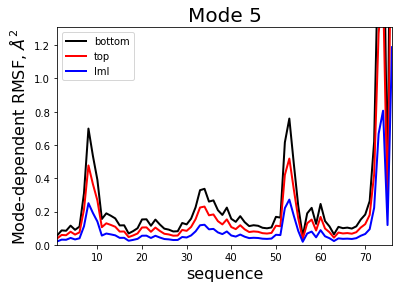

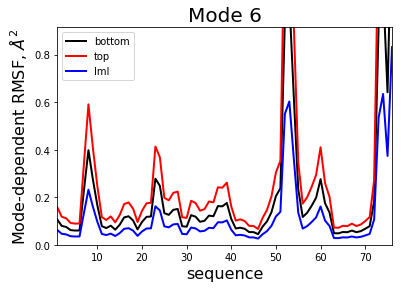

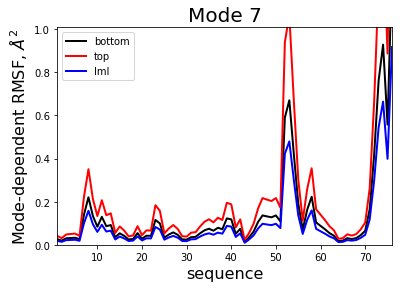

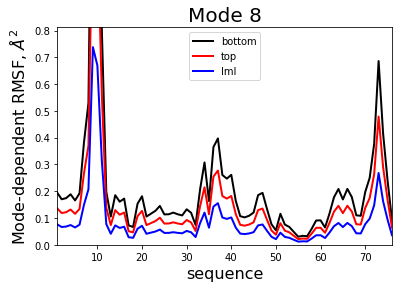

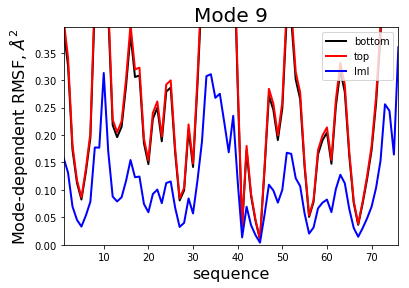

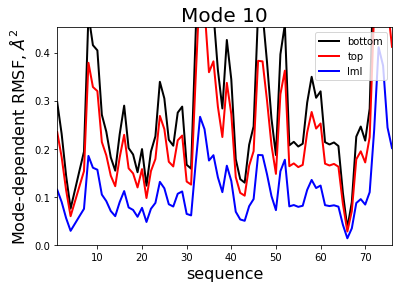

In [11]:
nimages = 11
nres = 76
for mode in range(1, 11):
    subprocess.call('grep "^ATOM" ../mode' + str(mode) + '/HA_mode' + str(mode) + "image_avg_bottom.pdb | awk '{ print $7" + '" "' + "$8" + '" "' + "$9 }' > tmp", shell = True)
    ref = np.loadtxt('tmp')
    subprocess.call('rm -rfv tmp', shell = True)
    #print(ref)

    traj = np.reshape(ref.ravel(), (nimages, 3*nres)).T
    avg_coor = np.loadtxt('../avg_coor')
    QINV = np.reshape(np.loadtxt('../com_HCINVmatrix'), (3*nres, 3*nres))
    Q = np.reshape(np.loadtxt('../com_HCmatrix'), (3*nres, 3*nres))
    
    xi = np.matmul(QINV, traj)

    R_a = np.zeros((3*nres, nimages))
    for i in range(R_a.shape[0]):
        for k in range(R_a.shape[1]):
            R_a[i,k] = avg_coor.ravel()[i] + Q[i,mode - 1]*xi[mode - 1,k]
            
    traj = R_a

    rmsf = np.zeros(nres)

    for i in range(nimages):
        for num, j in enumerate(range(0, 3*nres, 3)):
            rmsf[num] += (traj[j, i] - traj[j, 0])**2 + (traj[j+1, i] - traj[j+1, 0])**2 + (traj[j+2, i] - traj[j+2, 0])**2
    rmsf = rmsf / nimages
    rmsf = np.sqrt(rmsf)
    
    plt.plot(np.arange(1, nres + 1), rmsf, lw = 2, c = 'k', label = 'bottom')
    
    subprocess.call('grep "^ATOM" ../mode' + str(mode) + '/HA_mode' + str(mode) + "image_avg_top.pdb | awk '{ print $7" + '" "' + "$8" + '" "' + "$9 }' > tmp", shell = True)
    ref = np.loadtxt('tmp')
    subprocess.call('rm -rfv tmp', shell = True)
    #print(ref)
    
    traj = np.reshape(ref.ravel(), (nimages, 3*nres)).T
    
    xi = np.matmul(QINV, traj)

    R_a = np.zeros((3*nres, nimages))
    for i in range(R_a.shape[0]):
        for k in range(R_a.shape[1]):
            R_a[i,k] = avg_coor.ravel()[i] + Q[i,mode - 1]*xi[mode - 1,k]
            
    traj = R_a

    rmsf = np.zeros(nres)

    for i in range(nimages):
        for num, j in enumerate(range(0, 3*nres, 3)):
            rmsf[num] += (traj[j, i] - traj[j, 0])**2 + (traj[j+1, i] - traj[j+1, 0])**2 + (traj[j+2, i] - traj[j+2, 0])**2
    rmsf = rmsf / nimages
    rmsf = np.sqrt(rmsf)
    
    plt.plot(np.arange(1, nres + 1), rmsf, lw = 2, c = 'r', label = 'top')
    
    lml = np.loadtxt('../HC_lml_' + str(mode) + '.dat')
    plt.plot(np.arange(1, nres + 1), lml, lw = 2, c = 'b', label = 'lml')
    
    plt.title('Mode ' + str(mode), fontsize = 20)
    plt.ylim((0, 1.1*lml.max()))
    plt.xlim((1, nres))
    plt.xlabel('sequence', fontsize = 16)
    plt.ylabel(r'Mode-dependent RMSF, $\AA^2$', fontsize = 16)
    plt.legend()
    plt.savefig('../figures/rmsf_path_HA_mode' + str(mode) + '.pdf', dpi = 300)
    plt.show()
    plt.close()

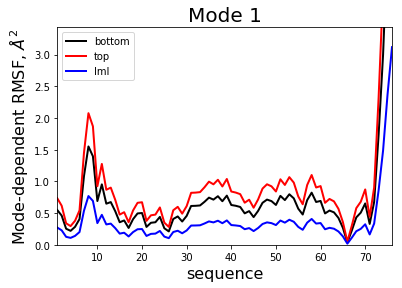

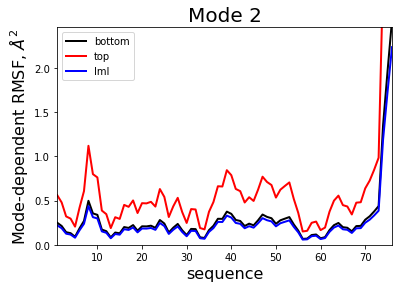

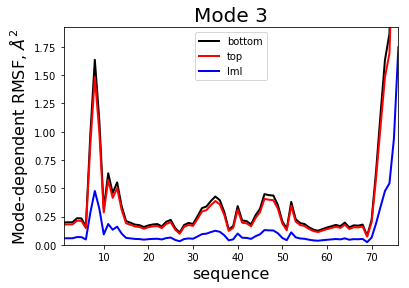

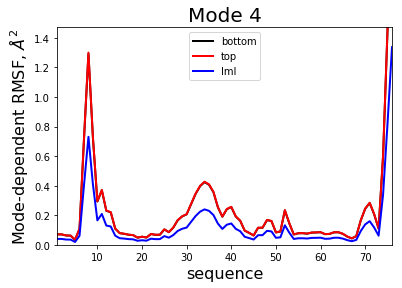

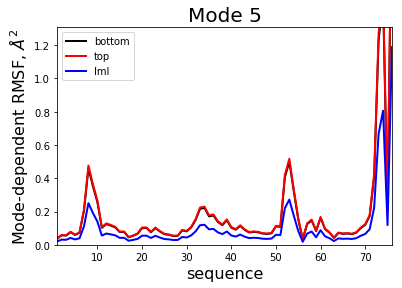

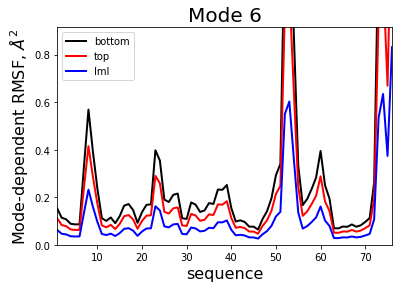

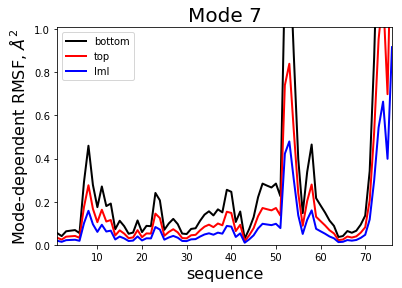

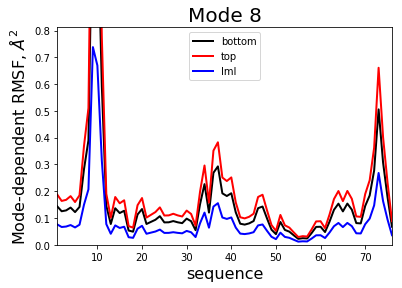

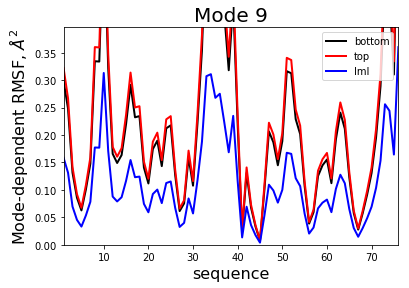

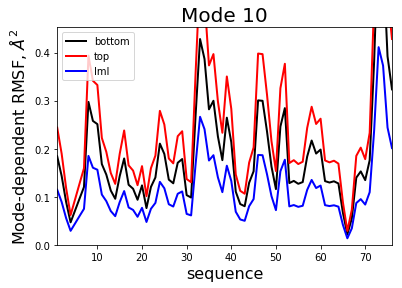

In [8]:
nimages = 11
nres = 76
for mode in range(1, 11):
    subprocess.call('grep "^ATOM" ../mode' + str(mode) + '/HA_mode' + str(mode) + "image_avg_bottom.pdb | awk '{ print $7" + '" "' + "$8" + '" "' + "$9 }' > tmp", shell = True)
    ref = np.loadtxt('tmp')
    subprocess.call('rm -rfv tmp', shell = True)
    #print(ref)

    traj = np.reshape(ref.ravel(), (nimages, 3*nres)).T
    avg_coor = np.loadtxt('../avg_coor')
    QINV = np.reshape(np.loadtxt('../com_HCINVmatrix'), (3*nres, 3*nres))
    Q = np.reshape(np.loadtxt('../com_HCmatrix'), (3*nres, 3*nres))
    
    xi = np.matmul(QINV, traj)

    R_a = np.zeros((3*nres, nimages))
    for i in range(R_a.shape[0]):
        for k in range(R_a.shape[1]):
            R_a[i,k] = avg_coor.ravel()[i] + Q[i,mode - 1]*xi[mode - 1,k]
            
    traj = R_a

    rmsf = np.zeros(nres)

    for i in range(nimages):
        for num, j in enumerate(range(0, 3*nres, 3)):
            rmsf[num] += (traj[j, i] - traj[j, -1])**2 + (traj[j+1, i] - traj[j+1, -1])**2 + (traj[j+2, i] - traj[j+2, -1])**2
    rmsf = rmsf / nimages
    rmsf = np.sqrt(rmsf)
    
    plt.plot(np.arange(1, nres + 1), rmsf, lw = 2, c = 'k', label = 'bottom')
    
    subprocess.call('grep "^ATOM" ../mode' + str(mode) + '/HA_mode' + str(mode) + "image_avg_top.pdb | awk '{ print $7" + '" "' + "$8" + '" "' + "$9 }' > tmp", shell = True)
    ref = np.loadtxt('tmp')
    subprocess.call('rm -rfv tmp', shell = True)
    #print(ref)
    
    traj = np.reshape(ref.ravel(), (nimages, 3*nres)).T
    
    xi = np.matmul(QINV, traj)

    R_a = np.zeros((3*nres, nimages))
    for i in range(R_a.shape[0]):
        for k in range(R_a.shape[1]):
            R_a[i,k] = avg_coor.ravel()[i] + Q[i,mode - 1]*xi[mode - 1,k]
            
    traj = R_a

    rmsf = np.zeros(nres)

    for i in range(nimages):
        for num, j in enumerate(range(0, 3*nres, 3)):
            rmsf[num] += (traj[j, i] - traj[j, -1])**2 + (traj[j+1, i] - traj[j+1, -1])**2 + (traj[j+2, i] - traj[j+2, -1])**2
    rmsf = rmsf / nimages
    rmsf = np.sqrt(rmsf)
    
    plt.plot(np.arange(1, nres + 1), rmsf, lw = 2, c = 'r', label = 'top')
    
    lml = np.loadtxt('../HC_lml_' + str(mode) + '.dat')
    plt.plot(np.arange(1, nres + 1), lml, lw = 2, c = 'b', label = 'lml')
    
    plt.title('Mode ' + str(mode), fontsize = 20)
    plt.ylim((0, 1.1*lml.max()))
    plt.xlim((1, nres))
    plt.xlabel('sequence', fontsize = 16)
    plt.ylabel(r'Mode-dependent RMSF, $\AA^2$', fontsize = 16)
    plt.legend()
    plt.show()
    plt.close()

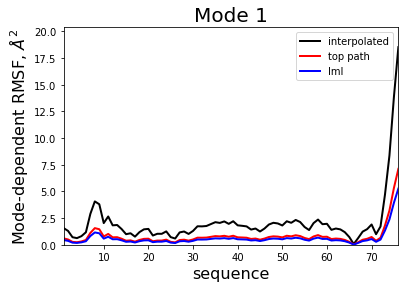

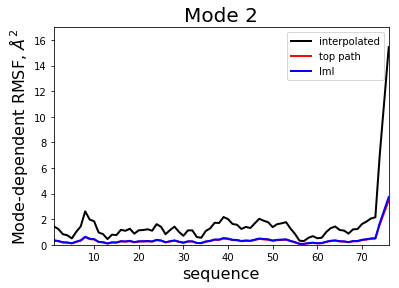

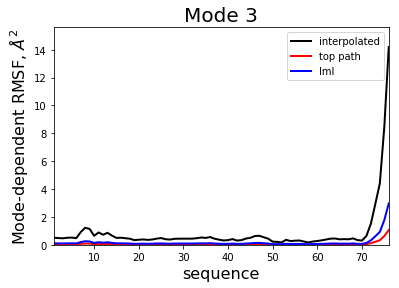

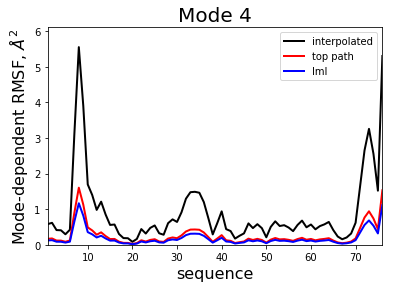

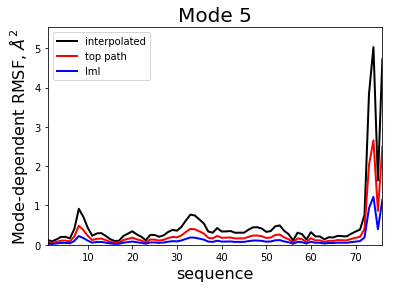

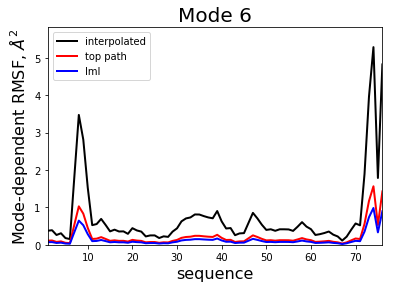

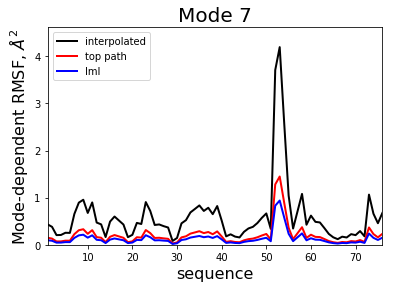

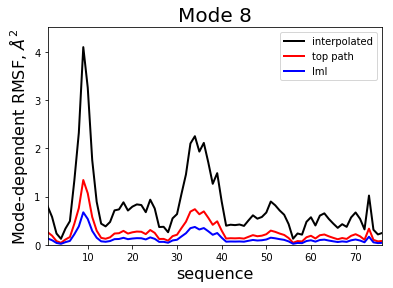

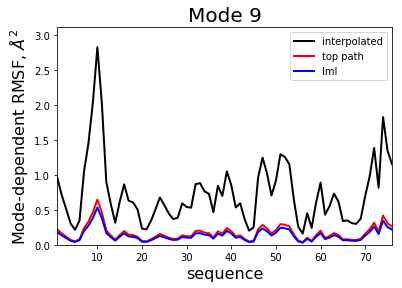

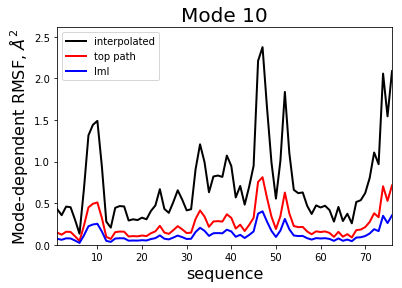

In [27]:
#Do it for the interpolated trajectory

nimages = 10
nres = 76
for mode in range(1, 11):
    subprocess.call('grep "^ATOM" ../tmp' + str(mode) + ".pdb | awk '{ print $7" + '" "' + "$8" + '" "' + "$9 }' > tmp", shell = True)
    ref = np.loadtxt('tmp')
    subprocess.call('rm -rfv tmp', shell = True)
    #print(ref)

    traj = np.reshape(ref.ravel(), (nimages, 3*nres)).T
    avg_coor = np.loadtxt('../avg_coor')
    QINV = np.reshape(np.loadtxt('../com_RTmatrix'), (3*nres, 3*nres))
    Q = np.reshape(np.loadtxt('../com_Rmatrix'), (3*nres, 3*nres))
    
    xi = np.matmul(QINV, traj)

    R_a = np.zeros((3*nres, nimages))
    for i in range(R_a.shape[0]):
        for k in range(R_a.shape[1]):
            R_a[i,k] = avg_coor.ravel()[i] + Q[i,mode - 1]*xi[mode - 1,k]
            
    traj = R_a

    rmsf = np.zeros(nres)

    for i in range(nimages):
        for num, j in enumerate(range(0, 3*nres, 3)):
            rmsf[num] += (traj[j, i] - traj[j, 0])**2 + (traj[j+1, i] - traj[j+1, 0])**2 + (traj[j+2, i] - traj[j+2, 0])**2
    rmsf = rmsf / nimages
    rmsf = np.sqrt(rmsf)
    
    plt.plot(np.arange(1, nres + 1), rmsf, lw = 2, c = 'k', label = 'interpolated')
    plt.ylim((0, 1.1*rmsf[:].max()))
    
    subprocess.call('grep "^ATOM" ../mode' + str(mode) + '/mode' + str(mode) + "image_avg_top.pdb | awk '{ print $7" + '" "' + "$8" + '" "' + "$9 }' > tmp", shell = True)
    ref = np.loadtxt('tmp')
    subprocess.call('rm -rfv tmp', shell = True)
    #print(ref)
    
    traj = np.reshape(ref.ravel(), (nimages + 1, 3*nres)).T
    
    xi = np.matmul(QINV, traj)

    R_a = np.zeros((3*nres, nimages))
    for i in range(R_a.shape[0]):
        for k in range(R_a.shape[1]):
            R_a[i,k] = avg_coor.ravel()[i] + Q[i,mode - 1]*xi[mode - 1,k]
            
    traj = R_a

    rmsf = np.zeros(nres)

    for i in range(nimages):
        for num, j in enumerate(range(0, 3*nres, 3)):
            rmsf[num] += (traj[j, i] - traj[j, -1])**2 + (traj[j+1, i] - traj[j+1, -1])**2 + (traj[j+2, i] - traj[j+2, -1])**2
    rmsf = rmsf / nimages
    rmsf = np.sqrt(rmsf)
    
    plt.plot(np.arange(1, nres + 1), rmsf, lw = 2, c = 'r', label = 'top path')
    
    lml = np.loadtxt('../lml_' + str(mode) + '.dat')
    plt.plot(np.arange(1, nres + 1), lml, lw = 2, c = 'b', label = 'lml')
    
    plt.title('Mode ' + str(mode), fontsize = 20)
    plt.xlim((1, nres))
    plt.xlabel('sequence', fontsize = 16)
    plt.ylabel(r'Mode-dependent RMSF, $\AA^2$', fontsize = 16)
    plt.legend()
    plt.savefig('../figures/rmsf_path_interpol_mode' + str(mode) + '.pdf', dpi = 300)
    plt.show()
    plt.close()

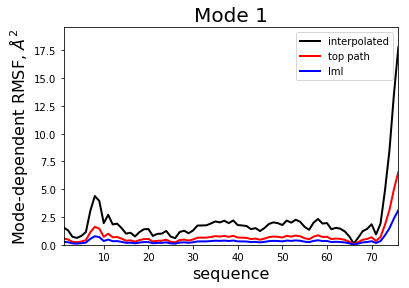

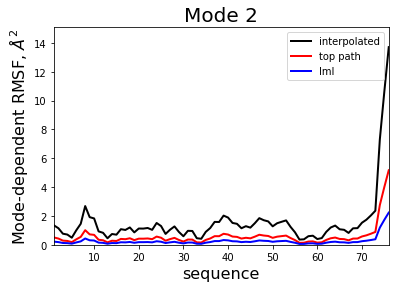

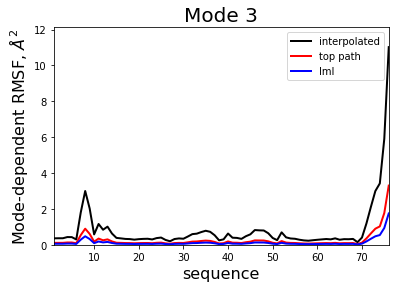

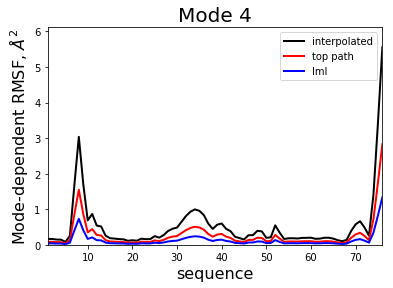

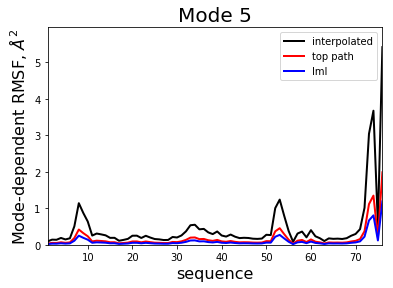

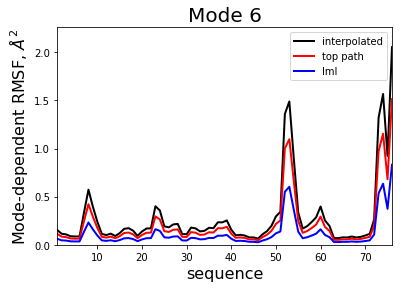

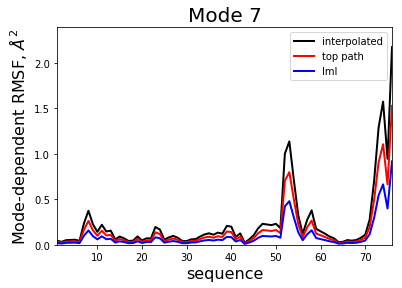

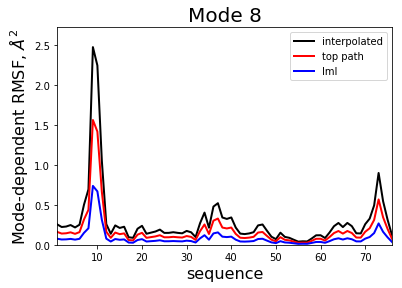

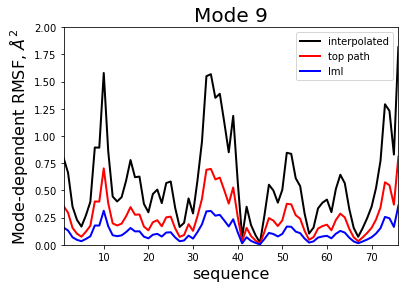

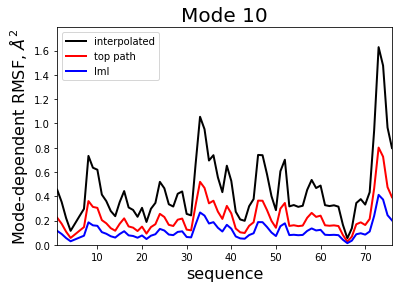

In [26]:
#Do it for the interpolated trajectory

nimages = 10
nres = 76
for mode in range(1, 11):
    subprocess.call('grep "^ATOM" ../tmp' + str(mode) + ".pdb | awk '{ print $7" + '" "' + "$8" + '" "' + "$9 }' > tmp", shell = True)
    ref = np.loadtxt('tmp')
    subprocess.call('rm -rfv tmp', shell = True)
    #print(ref)

    traj = np.reshape(ref.ravel(), (nimages, 3*nres)).T
    avg_coor = np.loadtxt('../avg_coor')
    QINV = np.reshape(np.loadtxt('../com_HCINVmatrix'), (3*nres, 3*nres))
    Q = np.reshape(np.loadtxt('../com_HCmatrix'), (3*nres, 3*nres))
    
    xi = np.matmul(QINV, traj)

    R_a = np.zeros((3*nres, nimages))
    for i in range(R_a.shape[0]):
        for k in range(R_a.shape[1]):
            R_a[i,k] = avg_coor.ravel()[i] + Q[i,mode - 1]*xi[mode - 1,k]
            
    traj = R_a

    rmsf = np.zeros(nres)

    for i in range(nimages):
        for num, j in enumerate(range(0, 3*nres, 3)):
            rmsf[num] += (traj[j, i] - traj[j, 0])**2 + (traj[j+1, i] - traj[j+1, 0])**2 + (traj[j+2, i] - traj[j+2, 0])**2
    rmsf = rmsf / nimages
    rmsf = np.sqrt(rmsf)
    
    plt.plot(np.arange(1, nres + 1), rmsf, lw = 2, c = 'k', label = 'interpolated')
    plt.ylim((0, 1.1*rmsf.max()))
    
    subprocess.call('grep "^ATOM" ../mode' + str(mode) + '/HA_mode' + str(mode) + "image_avg_top.pdb | awk '{ print $7" + '" "' + "$8" + '" "' + "$9 }' > tmp", shell = True)
    ref = np.loadtxt('tmp')
    subprocess.call('rm -rfv tmp', shell = True)
    #print(ref)
    
    traj = np.reshape(ref.ravel(), (nimages + 1, 3*nres)).T
    
    xi = np.matmul(QINV, traj)

    R_a = np.zeros((3*nres, nimages))
    for i in range(R_a.shape[0]):
        for k in range(R_a.shape[1]):
            R_a[i,k] = avg_coor.ravel()[i] + Q[i,mode - 1]*xi[mode - 1,k]
            
    traj = R_a

    rmsf = np.zeros(nres)

    for i in range(nimages):
        for num, j in enumerate(range(0, 3*nres, 3)):
            rmsf[num] += (traj[j, i] - traj[j, -1])**2 + (traj[j+1, i] - traj[j+1, -1])**2 + (traj[j+2, i] - traj[j+2, -1])**2
    rmsf = rmsf / nimages
    rmsf = np.sqrt(rmsf)
    
    plt.plot(np.arange(1, nres + 1), rmsf, lw = 2, c = 'r', label = 'top path')
    
    lml = np.loadtxt('../HC_lml_' + str(mode) + '.dat')
    plt.plot(np.arange(1, nres + 1), lml, lw = 2, c = 'b', label = 'lml')
    
    plt.title('Mode ' + str(mode), fontsize = 20)
    plt.xlim((1, nres))
    plt.xlabel('sequence', fontsize = 16)
    plt.ylabel(r'Mode-dependent RMSF, $\AA^2$', fontsize = 16)
    plt.legend()
    plt.savefig('../figures/rmsf_path_interpol_HA_mode' + str(mode) + '.pdf', dpi = 300)
    plt.show()
    plt.close()

In [5]:
#Check the predictive ability of path analysis via anisotropic lml

lamb = np.loadtxt('../com_covar_eig')
lamb_HA = np.loadtxt('../com_HC_eig')
Q = np.reshape(np.loadtxt('../com_Rmatrix'), (228, 228))
QHA = np.reshape(np.loadtxt('../com_HCmatrix'), (228, 228))

HA_lml_x = QHA[::3]**2*lamb_HA
HA_lml_y = QHA[1::3]**2*lamb_HA
HA_lml_z = QHA[2::3]**2*lamb_HA

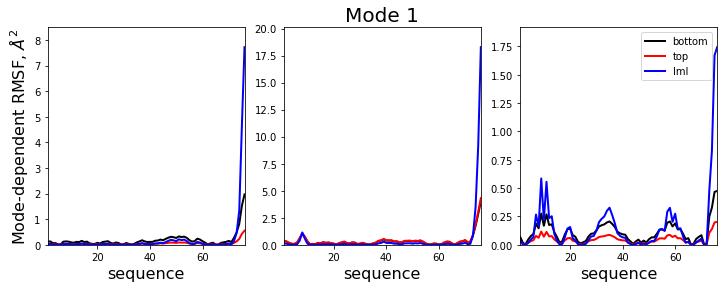

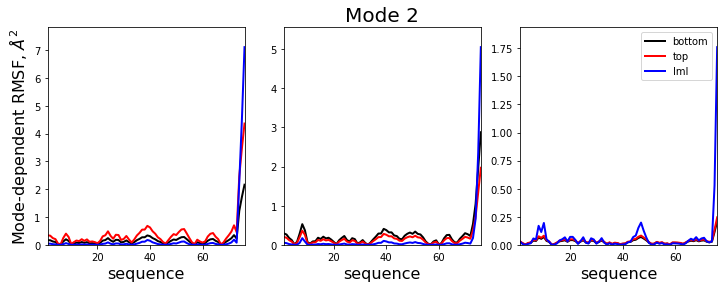

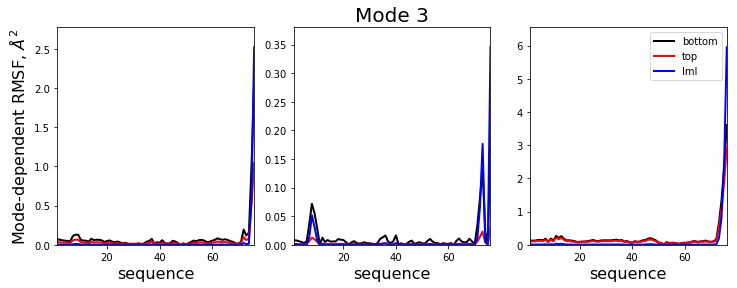

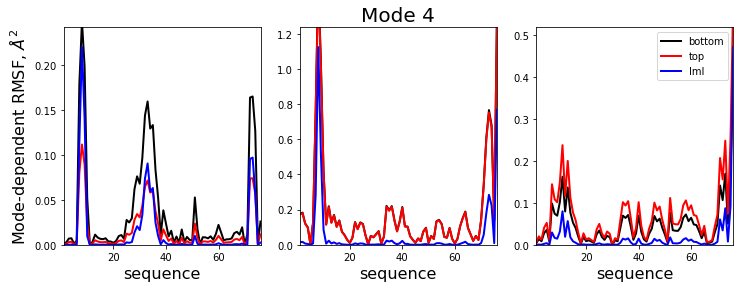

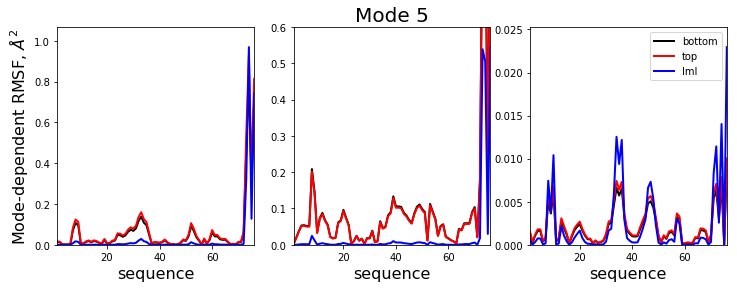

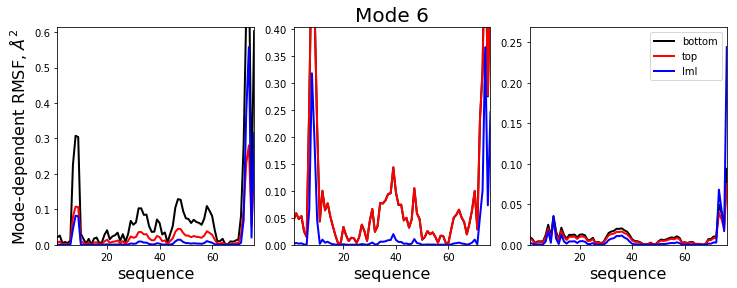

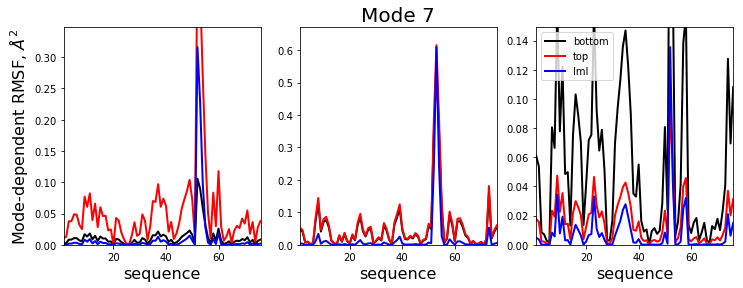

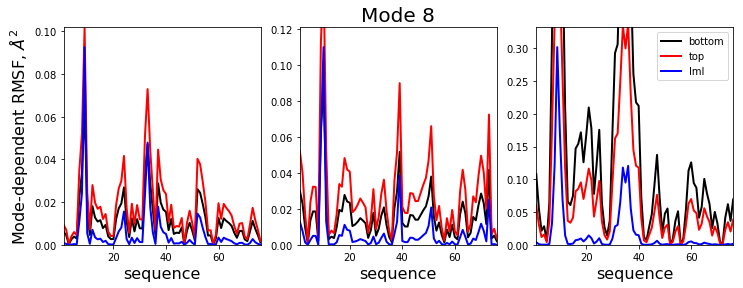

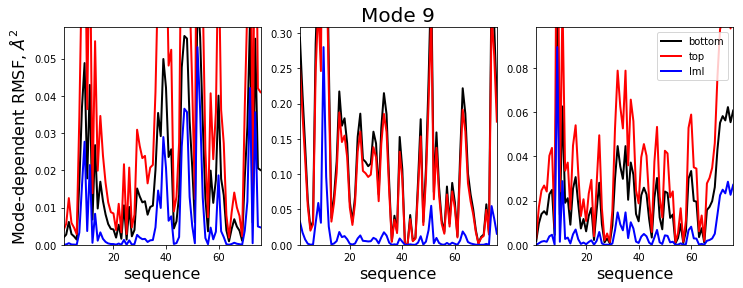

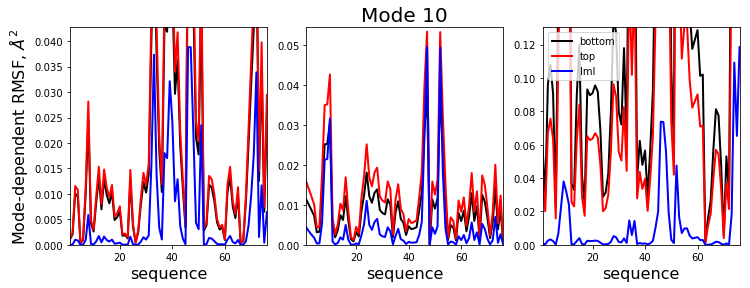

In [24]:
nimages = 11
nres = 76
for mode in range(1, 11):
    subprocess.call('grep "^ATOM" ../mode' + str(mode) + '/mode' + str(mode) + "image_avg_bottom.pdb | awk '{ print $7" + '" "' + "$8" + '" "' + "$9 }' > tmp", shell = True)
    ref = np.loadtxt('tmp')
    subprocess.call('rm -rfv tmp', shell = True)
    #print(ref)

    traj = np.reshape(ref.ravel(), (nimages, 3*nres)).T
    avg_coor = np.loadtxt('../avg_coor')
    QINV = np.reshape(np.loadtxt('../com_RTmatrix'), (3*nres, 3*nres))
    Q = np.reshape(np.loadtxt('../com_Rmatrix'), (3*nres, 3*nres))
    
    traj = np.reshape(ref.ravel(), (nimages, 3*nres)).T
    
    xtraj = traj[::3]
    ytraj = traj[1::3]
    ztraj = traj[2::3]
    
    xix = np.matmul(QINV[:,::3], xtraj)
    xiy = np.matmul(QINV[:,1::3], ytraj)
    xiz = np.matmul(QINV[:,2::3], ztraj)

    x_a = np.zeros((nres, nimages))
    y_a = np.zeros((nres, nimages))
    z_a = np.zeros((nres, nimages))
    
    for i in range(x_a.shape[0]):
        for k in range(x_a.shape[1]):
            x_a[i,k] = avg_coor.ravel()[i] + Q[::3,:][i,mode - 1]*xix[mode - 1,k]
            y_a[i,k] = avg_coor.ravel()[i] + Q[1::3,:][i,mode - 1]*xiy[mode - 1,k]
            z_a[i,k] = avg_coor.ravel()[i] + Q[2::3,:][i,mode - 1]*xiz[mode - 1,k]
            
    xtraj = x_a
    ytraj = y_a
    ztraj = z_a

    rmsfx = np.zeros(nres)
    rmsfy = np.zeros(nres)
    rmsfz = np.zeros(nres)

    for i in range(nimages):
        for num, j in enumerate(range(0, nres)):
            rmsfx[num] += (xtraj[j, i] - xtraj[j, 0])**2
            rmsfy[num] += (ytraj[j, i] - ytraj[j, 0])**2
            rmsfz[num] += (ztraj[j, i] - ztraj[j, 0])**2
    rmsfx = rmsfx / nimages
    rmsfx = np.sqrt(rmsfx)
    rmsfy = rmsfy / nimages
    rmsfy = np.sqrt(rmsfy)
    rmsfz = rmsfz / nimages
    rmsfz = np.sqrt(rmsfz)
    
    fig, (ax0, ax1, ax2) = plt.subplots(nrows = 1, ncols = 3, figsize = (12, 4), sharey = False)
    
    ax0.plot(np.arange(1, nres + 1), rmsfx, lw = 2, c = 'k', label = 'bottom')
    ax1.plot(np.arange(1, nres + 1), rmsfy, lw = 2, c = 'k', label = 'bottom')
    ax2.plot(np.arange(1, nres + 1), rmsfz, lw = 2, c = 'k', label = 'bottom')
    
    subprocess.call('grep "^ATOM" ../mode' + str(mode) + '/mode' + str(mode) + "image_avg_top.pdb | awk '{ print $7" + '" "' + "$8" + '" "' + "$9 }' > tmp", shell = True)
    ref = np.loadtxt('tmp')
    subprocess.call('rm -rfv tmp', shell = True)
    #print(ref)
    
    traj = np.reshape(ref.ravel(), (nimages, 3*nres)).T
    
    xtraj = traj[::3]
    ytraj = traj[1::3]
    ztraj = traj[2::3]
    
    xix = np.matmul(QINV[:,::3], xtraj)
    xiy = np.matmul(QINV[:,1::3], ytraj)
    xiz = np.matmul(QINV[:,2::3], ztraj)

    x_a = np.zeros((nres, nimages))
    y_a = np.zeros((nres, nimages))
    z_a = np.zeros((nres, nimages))
    
    for i in range(x_a.shape[0]):
        for k in range(x_a.shape[1]):
            x_a[i,k] = avg_coor.ravel()[i] + Q[::3,:][i,mode - 1]*xix[mode - 1,k]
            y_a[i,k] = avg_coor.ravel()[i] + Q[1::3,:][i,mode - 1]*xiy[mode - 1,k]
            z_a[i,k] = avg_coor.ravel()[i] + Q[2::3,:][i,mode - 1]*xiz[mode - 1,k]
            
    xtraj = x_a
    ytraj = y_a
    ztraj = z_a

    rmsfx = np.zeros(nres)
    rmsfy = np.zeros(nres)
    rmsfz = np.zeros(nres)

    for i in range(nimages):
        for num, j in enumerate(range(0, nres)):
            rmsfx[num] += (xtraj[j, i] - xtraj[j, 0])**2
            rmsfy[num] += (ytraj[j, i] - ytraj[j, 0])**2
            rmsfz[num] += (ztraj[j, i] - ztraj[j, 0])**2
    rmsfx = rmsfx / nimages
    rmsfx = np.sqrt(rmsfx)
    rmsfy = rmsfy / nimages
    rmsfy = np.sqrt(rmsfy)
    rmsfz = rmsfz / nimages
    rmsfz = np.sqrt(rmsfz)
    
    
    ax0.plot(np.arange(1, nres + 1), rmsfx, lw = 2, c = 'r', label = 'top')
    ax1.plot(np.arange(1, nres + 1), rmsfy, lw = 2, c = 'r', label = 'top')
    ax2.plot(np.arange(1, nres + 1), rmsfz, lw = 2, c = 'r', label = 'top')

    lml_x = (Q[::3,:]**2)[:, mode - 1]*lamb[mode - 1]*100
    lml_y = (Q[1::3,:]**2)[:, mode - 1]*lamb[mode - 1]*100
    lml_z = (Q[2::3,:]**2)[:, mode - 1]*lamb[mode - 1]*100
    ax0.plot(np.arange(1, nres + 1), lml_x, lw = 2, c = 'b', label = 'lml')
    ax1.plot(np.arange(1, nres + 1), lml_y, lw = 2, c = 'b', label = 'lml')
    ax2.plot(np.arange(1, nres + 1), lml_z, lw = 2, c = 'b', label = 'lml')
    
    ax1.set_title('Mode ' + str(mode), fontsize = 20)
    ax0.set_ylim((0, 1.1*lml_x.max()))
    ax1.set_ylim((0, 1.1*lml_y.max()))
    ax2.set_ylim((0, 1.1*lml_z.max()))
    ax0.set_xlim((1, nres))
    ax1.set_xlim((1, nres))
    ax2.set_xlim((1, nres))
    ax0.set_xlabel('sequence', fontsize = 16)
    ax1.set_xlabel('sequence', fontsize = 16)
    ax2.set_xlabel('sequence', fontsize = 16)
    ax0.set_ylabel(r'Mode-dependent RMSF, $\AA^2$', fontsize = 16)
    plt.legend()
    #plt.savefig('../figures/rmsf_path_mode' + str(mode) + '.pdf', dpi = 300)
    plt.show()
    plt.close()

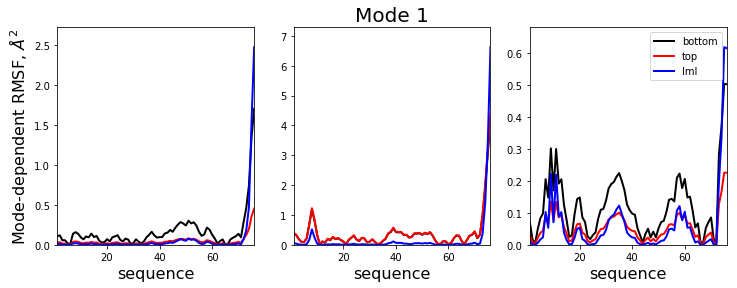

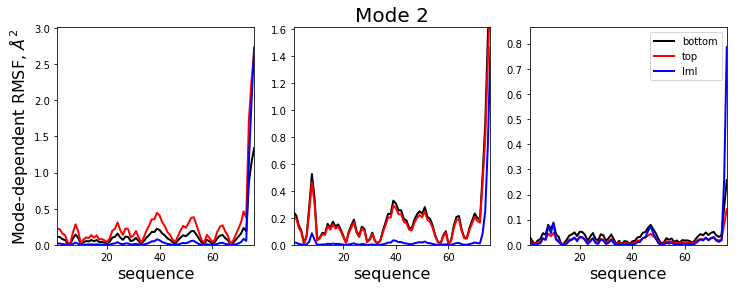

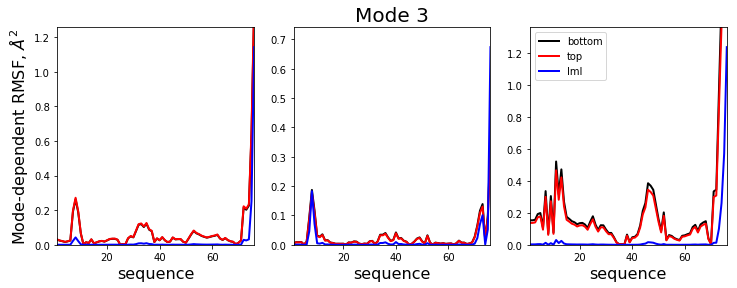

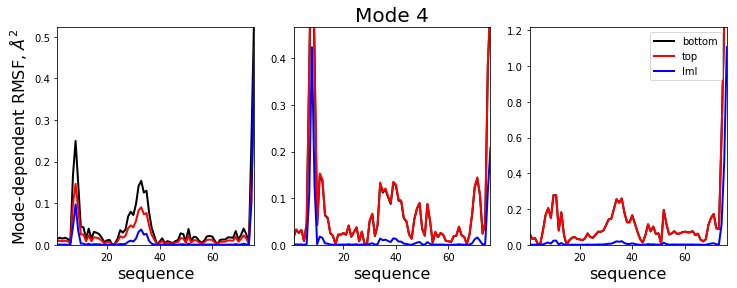

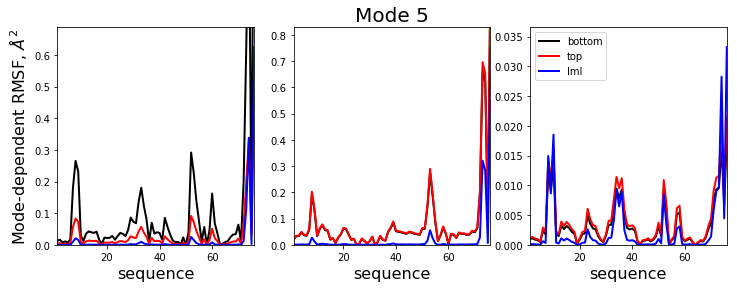

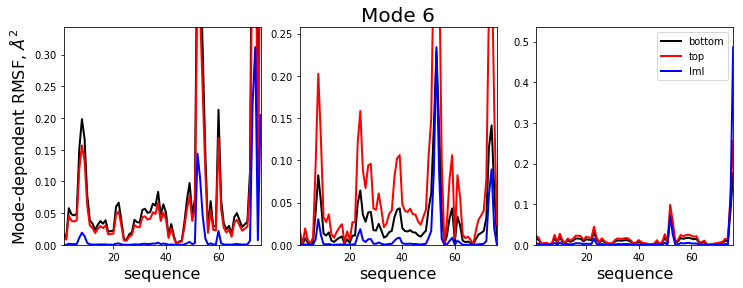

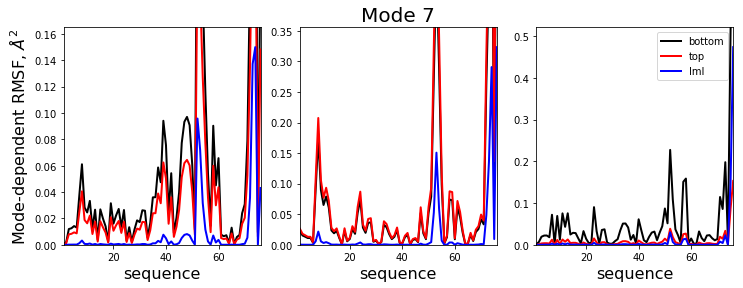

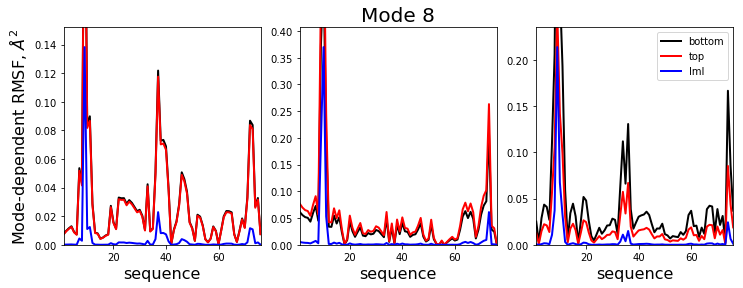

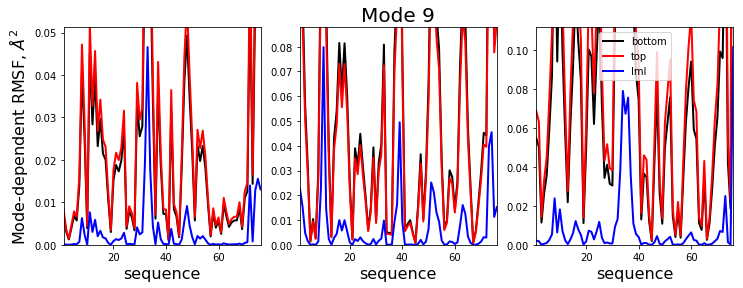

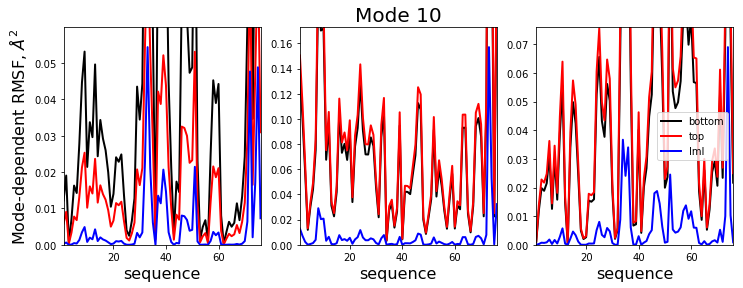

In [28]:
nimages = 11
nres = 76
for mode in range(1, 11):
    subprocess.call('grep "^ATOM" ../mode' + str(mode) + '/HA_mode' + str(mode) + "image_avg_bottom.pdb | awk '{ print $7" + '" "' + "$8" + '" "' + "$9 }' > tmp", shell = True)
    ref = np.loadtxt('tmp')
    subprocess.call('rm -rfv tmp', shell = True)
    #print(ref)

    traj = np.reshape(ref.ravel(), (nimages, 3*nres)).T
    avg_coor = np.loadtxt('../avg_coor')
    QINV = np.reshape(np.loadtxt('../com_HCINVmatrix'), (3*nres, 3*nres))
    Q = np.reshape(np.loadtxt('../com_HCmatrix'), (3*nres, 3*nres))
    lamb = np.loadtxt('../com_HC_eig')
    
    traj = np.reshape(ref.ravel(), (nimages, 3*nres)).T
    
    xtraj = traj[::3]
    ytraj = traj[1::3]
    ztraj = traj[2::3]
    
    xix = np.matmul(QINV[:,::3], xtraj)
    xiy = np.matmul(QINV[:,1::3], ytraj)
    xiz = np.matmul(QINV[:,2::3], ztraj)

    x_a = np.zeros((nres, nimages))
    y_a = np.zeros((nres, nimages))
    z_a = np.zeros((nres, nimages))
    
    for i in range(x_a.shape[0]):
        for k in range(x_a.shape[1]):
            x_a[i,k] = avg_coor.ravel()[i] + Q[::3,:][i,mode - 1]*xix[mode - 1,k]
            y_a[i,k] = avg_coor.ravel()[i] + Q[1::3,:][i,mode - 1]*xiy[mode - 1,k]
            z_a[i,k] = avg_coor.ravel()[i] + Q[2::3,:][i,mode - 1]*xiz[mode - 1,k]
            
    xtraj = x_a
    ytraj = y_a
    ztraj = z_a

    rmsfx = np.zeros(nres)
    rmsfy = np.zeros(nres)
    rmsfz = np.zeros(nres)

    for i in range(nimages):
        for num, j in enumerate(range(0, nres)):
            rmsfx[num] += (xtraj[j, i] - xtraj[j, 0])**2
            rmsfy[num] += (ytraj[j, i] - ytraj[j, 0])**2
            rmsfz[num] += (ztraj[j, i] - ztraj[j, 0])**2
    rmsfx = rmsfx / nimages
    rmsfx = np.sqrt(rmsfx)
    rmsfy = rmsfy / nimages
    rmsfy = np.sqrt(rmsfy)
    rmsfz = rmsfz / nimages
    rmsfz = np.sqrt(rmsfz)
    
    fig, (ax0, ax1, ax2) = plt.subplots(nrows = 1, ncols = 3, figsize = (12, 4), sharey = False)
    
    ax0.plot(np.arange(1, nres + 1), rmsfx, lw = 2, c = 'k', label = 'bottom')
    ax1.plot(np.arange(1, nres + 1), rmsfy, lw = 2, c = 'k', label = 'bottom')
    ax2.plot(np.arange(1, nres + 1), rmsfz, lw = 2, c = 'k', label = 'bottom')
    
    subprocess.call('grep "^ATOM" ../mode' + str(mode) + '/HA_mode' + str(mode) + "image_avg_top.pdb | awk '{ print $7" + '" "' + "$8" + '" "' + "$9 }' > tmp", shell = True)
    ref = np.loadtxt('tmp')
    subprocess.call('rm -rfv tmp', shell = True)
    #print(ref)
    
    traj = np.reshape(ref.ravel(), (nimages, 3*nres)).T
    
    xtraj = traj[::3]
    ytraj = traj[1::3]
    ztraj = traj[2::3]
    
    xix = np.matmul(QINV[:,::3], xtraj)
    xiy = np.matmul(QINV[:,1::3], ytraj)
    xiz = np.matmul(QINV[:,2::3], ztraj)

    x_a = np.zeros((nres, nimages))
    y_a = np.zeros((nres, nimages))
    z_a = np.zeros((nres, nimages))
    
    for i in range(x_a.shape[0]):
        for k in range(x_a.shape[1]):
            x_a[i,k] = avg_coor.ravel()[i] + Q[::3,:][i,mode - 1]*xix[mode - 1,k]
            y_a[i,k] = avg_coor.ravel()[i] + Q[1::3,:][i,mode - 1]*xiy[mode - 1,k]
            z_a[i,k] = avg_coor.ravel()[i] + Q[2::3,:][i,mode - 1]*xiz[mode - 1,k]
            
    xtraj = x_a
    ytraj = y_a
    ztraj = z_a

    rmsfx = np.zeros(nres)
    rmsfy = np.zeros(nres)
    rmsfz = np.zeros(nres)

    for i in range(nimages):
        for num, j in enumerate(range(0, nres)):
            rmsfx[num] += (xtraj[j, i] - xtraj[j, 0])**2
            rmsfy[num] += (ytraj[j, i] - ytraj[j, 0])**2
            rmsfz[num] += (ztraj[j, i] - ztraj[j, 0])**2
    rmsfx = rmsfx / nimages
    rmsfx = np.sqrt(rmsfx)
    rmsfy = rmsfy / nimages
    rmsfy = np.sqrt(rmsfy)
    rmsfz = rmsfz / nimages
    rmsfz = np.sqrt(rmsfz)
    
    
    ax0.plot(np.arange(1, nres + 1), rmsfx, lw = 2, c = 'r', label = 'top')
    ax1.plot(np.arange(1, nres + 1), rmsfy, lw = 2, c = 'r', label = 'top')
    ax2.plot(np.arange(1, nres + 1), rmsfz, lw = 2, c = 'r', label = 'top')

    lml_x = (Q[::3,:]**2)[:, mode - 1]*lamb[mode - 1]*100
    lml_y = (Q[1::3,:]**2)[:, mode - 1]*lamb[mode - 1]*100
    lml_z = (Q[2::3,:]**2)[:, mode - 1]*lamb[mode - 1]*100
    ax0.plot(np.arange(1, nres + 1), lml_x, lw = 2, c = 'b', label = 'lml')
    ax1.plot(np.arange(1, nres + 1), lml_y, lw = 2, c = 'b', label = 'lml')
    ax2.plot(np.arange(1, nres + 1), lml_z, lw = 2, c = 'b', label = 'lml')
    
    ax1.set_title('Mode ' + str(mode), fontsize = 20)
    ax0.set_ylim((0, 1.1*lml_x.max()))
    ax1.set_ylim((0, 1.1*lml_y.max()))
    ax2.set_ylim((0, 1.1*lml_z.max()))
    ax0.set_xlim((1, nres))
    ax1.set_xlim((1, nres))
    ax2.set_xlim((1, nres))
    ax0.set_xlabel('sequence', fontsize = 16)
    ax1.set_xlabel('sequence', fontsize = 16)
    ax2.set_xlabel('sequence', fontsize = 16)
    ax0.set_ylabel(r'Mode-dependent RMSF, $\AA^2$', fontsize = 16)
    plt.legend()
    #plt.savefig('../figures/rmsf_path_mode' + str(mode) + '.pdf', dpi = 300)
    plt.show()
    plt.close()

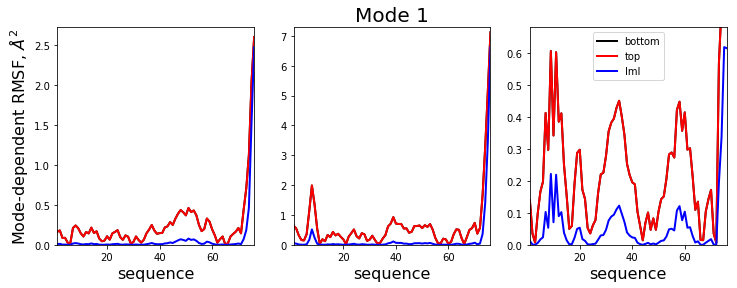

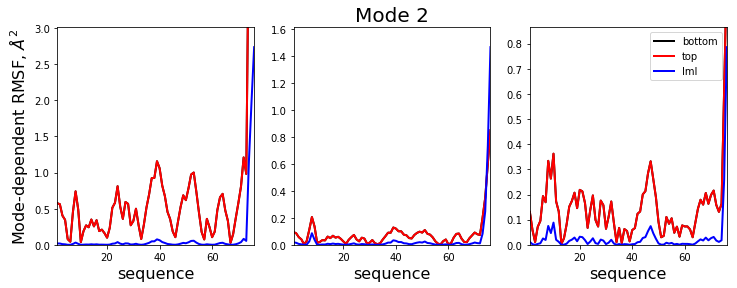

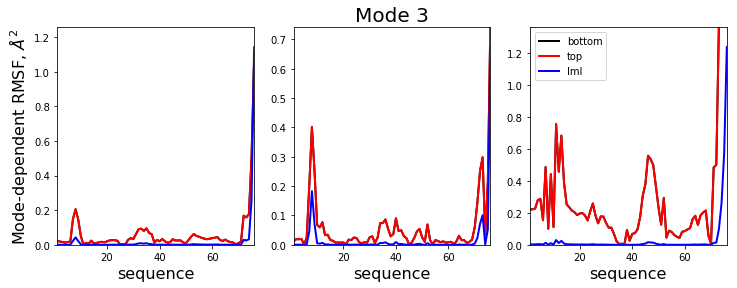

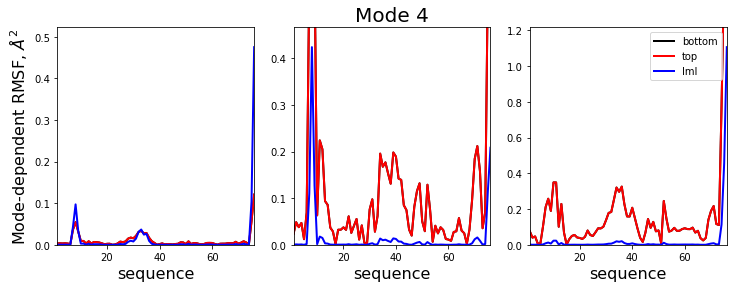

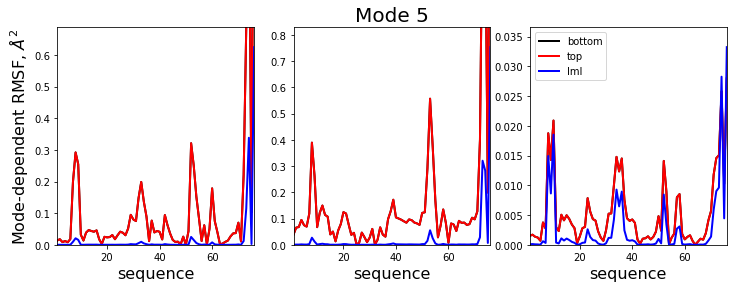

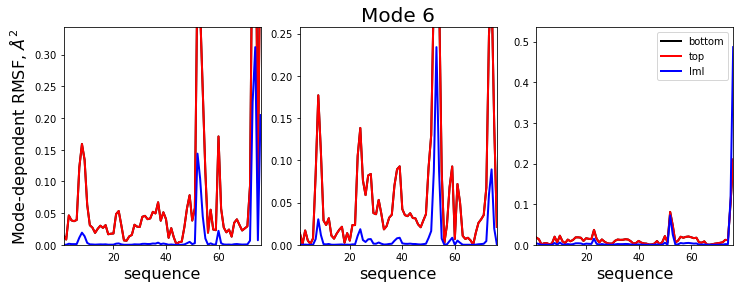

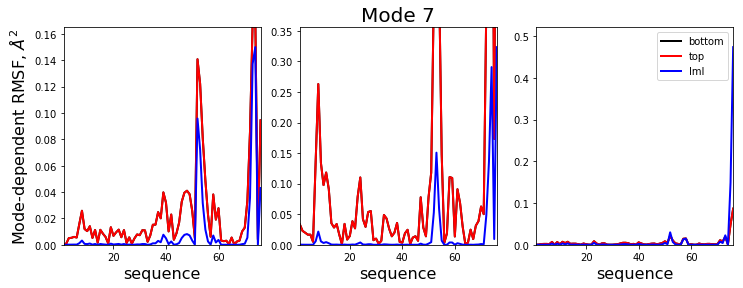

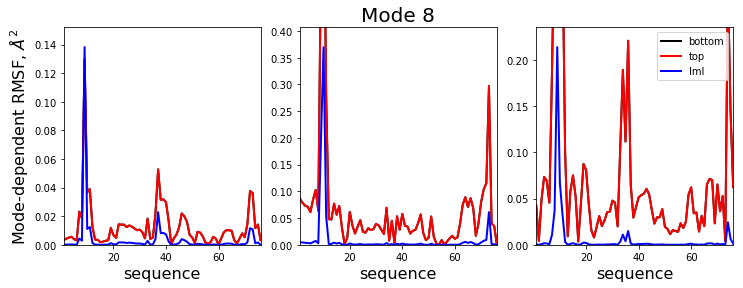

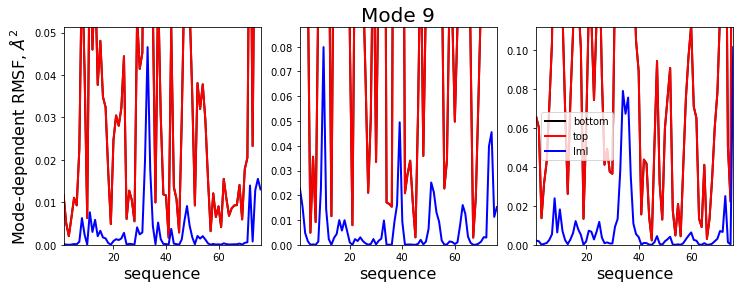

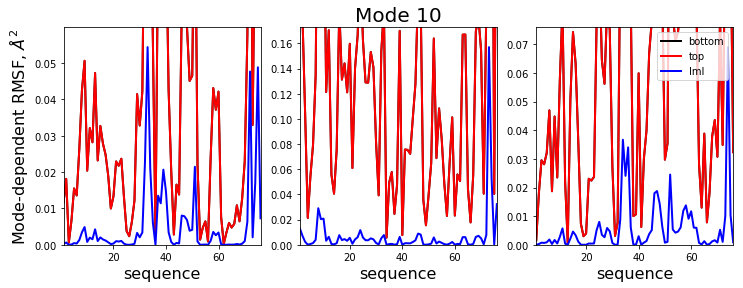

In [27]:
nimages = 10
nres = 76
for mode in range(1, 11):
    subprocess.call('grep "^ATOM" ../tmp' + str(mode) + ".pdb | awk '{ print $7" + '" "' + "$8" + '" "' + "$9 }' > tmp", shell = True)
    ref = np.loadtxt('tmp')
    subprocess.call('rm -rfv tmp', shell = True)
    #print(ref)

    traj = np.reshape(ref.ravel(), (nimages, 3*nres)).T
    avg_coor = np.loadtxt('../avg_coor')
    QINV = np.reshape(np.loadtxt('../com_HCINVmatrix'), (3*nres, 3*nres))
    Q = np.reshape(np.loadtxt('../com_HCmatrix'), (3*nres, 3*nres))
    lamb = np.loadtxt('../com_HC_eig')
    
    traj = np.reshape(ref.ravel(), (nimages, 3*nres)).T
    
    xtraj = traj[::3]
    ytraj = traj[1::3]
    ztraj = traj[2::3]
    
    xix = np.matmul(QINV[:,::3], xtraj)
    xiy = np.matmul(QINV[:,1::3], ytraj)
    xiz = np.matmul(QINV[:,2::3], ztraj)

    x_a = np.zeros((nres, nimages))
    y_a = np.zeros((nres, nimages))
    z_a = np.zeros((nres, nimages))
    
    for i in range(x_a.shape[0]):
        for k in range(x_a.shape[1]):
            x_a[i,k] = avg_coor.ravel()[i] + Q[::3,:][i,mode - 1]*xix[mode - 1,k]
            y_a[i,k] = avg_coor.ravel()[i] + Q[1::3,:][i,mode - 1]*xiy[mode - 1,k]
            z_a[i,k] = avg_coor.ravel()[i] + Q[2::3,:][i,mode - 1]*xiz[mode - 1,k]
            
    xtraj = x_a
    ytraj = y_a
    ztraj = z_a

    rmsfx = np.zeros(nres)
    rmsfy = np.zeros(nres)
    rmsfz = np.zeros(nres)

    for i in range(nimages):
        for num, j in enumerate(range(0, nres)):
            rmsfx[num] += (xtraj[j, i] - xtraj[j, 0])**2
            rmsfy[num] += (ytraj[j, i] - ytraj[j, 0])**2
            rmsfz[num] += (ztraj[j, i] - ztraj[j, 0])**2
    rmsfx = rmsfx / nimages
    rmsfx = np.sqrt(rmsfx)
    rmsfy = rmsfy / nimages
    rmsfy = np.sqrt(rmsfy)
    rmsfz = rmsfz / nimages
    rmsfz = np.sqrt(rmsfz)
    
    fig, (ax0, ax1, ax2) = plt.subplots(nrows = 1, ncols = 3, figsize = (12, 4), sharey = False)
    
    ax0.plot(np.arange(1, nres + 1), rmsfx, lw = 2, c = 'k', label = 'bottom')
    ax1.plot(np.arange(1, nres + 1), rmsfy, lw = 2, c = 'k', label = 'bottom')
    ax2.plot(np.arange(1, nres + 1), rmsfz, lw = 2, c = 'k', label = 'bottom')
    
    subprocess.call('grep "^ATOM" ../tmp' + str(mode) + ".pdb | awk '{ print $7" + '" "' + "$8" + '" "' + "$9 }' > tmp", shell = True)
    ref = np.loadtxt('tmp')
    subprocess.call('rm -rfv tmp', shell = True)
    #print(ref)
    
    traj = np.reshape(ref.ravel(), (nimages, 3*nres)).T
    
    xtraj = traj[::3]
    ytraj = traj[1::3]
    ztraj = traj[2::3]
    
    xix = np.matmul(QINV[:,::3], xtraj)
    xiy = np.matmul(QINV[:,1::3], ytraj)
    xiz = np.matmul(QINV[:,2::3], ztraj)

    x_a = np.zeros((nres, nimages))
    y_a = np.zeros((nres, nimages))
    z_a = np.zeros((nres, nimages))
    
    for i in range(x_a.shape[0]):
        for k in range(x_a.shape[1]):
            x_a[i,k] = avg_coor.ravel()[i] + Q[::3,:][i,mode - 1]*xix[mode - 1,k]
            y_a[i,k] = avg_coor.ravel()[i] + Q[1::3,:][i,mode - 1]*xiy[mode - 1,k]
            z_a[i,k] = avg_coor.ravel()[i] + Q[2::3,:][i,mode - 1]*xiz[mode - 1,k]
            
    xtraj = x_a
    ytraj = y_a
    ztraj = z_a

    rmsfx = np.zeros(nres)
    rmsfy = np.zeros(nres)
    rmsfz = np.zeros(nres)

    for i in range(nimages):
        for num, j in enumerate(range(0, nres)):
            rmsfx[num] += (xtraj[j, i] - xtraj[j, 0])**2
            rmsfy[num] += (ytraj[j, i] - ytraj[j, 0])**2
            rmsfz[num] += (ztraj[j, i] - ztraj[j, 0])**2
    rmsfx = rmsfx / nimages
    rmsfx = np.sqrt(rmsfx)
    rmsfy = rmsfy / nimages
    rmsfy = np.sqrt(rmsfy)
    rmsfz = rmsfz / nimages
    rmsfz = np.sqrt(rmsfz)
    
    
    ax0.plot(np.arange(1, nres + 1), rmsfx, lw = 2, c = 'r', label = 'top')
    ax1.plot(np.arange(1, nres + 1), rmsfy, lw = 2, c = 'r', label = 'top')
    ax2.plot(np.arange(1, nres + 1), rmsfz, lw = 2, c = 'r', label = 'top')

    lml_x = (Q[::3,:]**2)[:, mode - 1]*lamb[mode - 1]*100
    lml_y = (Q[1::3,:]**2)[:, mode - 1]*lamb[mode - 1]*100
    lml_z = (Q[2::3,:]**2)[:, mode - 1]*lamb[mode - 1]*100
    ax0.plot(np.arange(1, nres + 1), lml_x, lw = 2, c = 'b', label = 'lml')
    ax1.plot(np.arange(1, nres + 1), lml_y, lw = 2, c = 'b', label = 'lml')
    ax2.plot(np.arange(1, nres + 1), lml_z, lw = 2, c = 'b', label = 'lml')
    
    ax1.set_title('Mode ' + str(mode), fontsize = 20)
    ax0.set_ylim((0, 1.1*lml_x.max()))
    ax1.set_ylim((0, 1.1*lml_y.max()))
    ax2.set_ylim((0, 1.1*lml_z.max()))
    ax0.set_xlim((1, nres))
    ax1.set_xlim((1, nres))
    ax2.set_xlim((1, nres))
    ax0.set_xlabel('sequence', fontsize = 16)
    ax1.set_xlabel('sequence', fontsize = 16)
    ax2.set_xlabel('sequence', fontsize = 16)
    ax0.set_ylabel(r'Mode-dependent RMSF, $\AA^2$', fontsize = 16)
    plt.legend()
    #plt.savefig('../figures/rmsf_path_mode' + str(mode) + '.pdf', dpi = 300)
    plt.show()
    plt.close()